## Final Project Submission

Please fill out:
* Student name: Henry Mativo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Starting by importing all the libraries
import pandas as pd
import numpy as np
import requests
import sqlite3
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

# DATA CLEANING SECTION

#### Functions that Fill NULL in Data Cleaning and check for Duplication

In [2]:
# This function is designed to fill null values in a column with the mode of that column
def fun_mode_fill_null(df, column_name):
    # First calculate the mode value of a string
    mode_value = df[column_name].astype(str).mode()[0]
    # Then fill the null values with the mode value
    df[column_name].fillna(mode_value, inplace=True)
    return df

In [3]:
# This function is designed to fill null values in a column with the median of that column
def fun_median_fill_null(df, column_name):
    # First calculate the median value of a float
    median_value = df[column_name].astype(float).median()
    # Then fill the null values with the median value
    df[column_name].fillna(value = median_value, inplace=True)
    return df

In [4]:
# This function is designed to fill null values in a column with the median of that column, with the added benefit of removing figures that block propoer execution
def fun_median_fill_null_prob(df, column_name, problem):
    # First calculate, remove the troublsome figure, then convert to float, then calculate the median
    median_value = df[column_name].str.replace(problem, '').astype(float).median()
    # Then fill the null values with the median value
    df[column_name].fillna(median_value, inplace=True)
    return df

In [5]:
# This function is designed to detect the number of duplicate values in a column
def fun_duplicate_count(df, columnname):
    # First check if there are any duplicated values in a column
    dupli_count = [df.duplicated(subset = columnname)]
    # Then print how many are present
    print(len(dupli_count))

In [6]:
# This function is designed to drop duplicate values in a column
def fun_duplicates_drop(df, column_name):
    # Use the drop_duplicates method in a column, then retain the 1st duplicate in that column, then ensure the drop is permanent
    df.drop_duplicates(subset=[column_name], keep='first', inplace=True)
    return df

In [7]:
# This function is designed to drop entire columns
def fun_column_drop(df, column_name):
    # Using the drop method to specify which column to drop in a dataframe
    df = df.drop(column_name, axis=1, inplace = True)
    return df


In [8]:
# This function is designed to replace values in a column with other values from a column containing similar values
def fun_replace_colvalues(df, columnnull, column_2):
    # Specify the column with null values,  the input the column with values you want to replace, then fill in the null values with values in the 2nd column
    df[columnnull] = df[columnnull].fillna(df[column_2].fillna(method = 'ffill'))
    return df

##### Function that adds day and month of a release

In [9]:
# This function is designed to convert dates in a column into days and months
def fun_date_convert(df, column_name, dayname, monthname):
    # Specify the column containing the dates and use pandas to_datetime method
    df[column_name] = pd.to_datetime(df[column_name])
    # Create new column that will contain the days and months
    df[dayname] = df[column_name].dt.day_name()
    df[monthname] = df[column_name].dt.month_name()
    return df

There are 6 files that are provided and will be using in this project. These are the:
1. bom.movie_gross.csv
2. im.db
3. rt.movie_info.tsv
4. rt.reviews.tsv
5. tmbd.movies.csv
6. tn.movie_budgets.csv


##### Cleaning the bom.movie_gross.csv

In [10]:
# Import data from bom.movie_gross in the zippedData folder
bom = pd.read_csv('zippedData/bom.movie_gross.csv')
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [11]:
# Check the missing values for the columns
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [12]:
# Check the data types of the columns
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [13]:
# Covert the foreign gross to a numeric
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

In [14]:
# Fill the null values in the domestic and foreign gross with the median values
fun_median_fill_null(bom, 'domestic_gross')
fun_median_fill_null(bom, 'foreign_gross')
fun_mode_fill_null(bom, 'studio')


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,2018
3384,El Pacto,Sony,2500.0,18900000.0,2018
3385,The Swan,Synergetic,2400.0,18900000.0,2018


In [15]:
# Create a new column worldwide gross by adding the domestic and foreign gross and filling the  ull values with the median
bom['worldwide_gross'] = bom['domestic_gross'] + bom['foreign_gross']
fun_median_fill_null(bom, 'foreign_gross')

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,2018,1.890620e+07
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,2018,1.890480e+07
3384,El Pacto,Sony,2500.0,18900000.0,2018,1.890250e+07
3385,The Swan,Synergetic,2400.0,18900000.0,2018,1.890240e+07


In [16]:
# Theck if there is any remaining missing values in the bom
bom.isna().sum()

title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
worldwide_gross    0
dtype: int64

In [17]:
# Now we shall check if there are any duplicate values in title as it is the unique column and drop any duplicates
fun_duplicate_count(bom, 'title')
fun_duplicates_drop(bom, 'title')

1


,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,2018,1.890620e+07
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,2018,1.890480e+07
3384,El Pacto,Sony,2500.0,18900000.0,2018,1.890250e+07
3385,The Swan,Synergetic,2400.0,18900000.0,2018,1.890240e+07


In [18]:
# We shall now reorder the table in a manner that makes it more readable
bom = bom.reindex(columns = ['title', 'studio', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'year'])
bom

,title,studio,domestic_gross,foreign_gross,worldwide_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,1.067000e+09,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,1.025500e+09,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,9.603000e+08,2010
3,Inception,WB,292600000.0,535700000.0,8.283000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,7.526000e+08,2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,1.890620e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,1.890480e+07,2018
3384,El Pacto,Sony,2500.0,18900000.0,1.890250e+07,2018
3385,The Swan,Synergetic,2400.0,18900000.0,1.890240e+07,2018


##### Cleaning the tmdb.movies.csv

In [19]:
# Open and read the file
tmdb = pd.read_csv('zippedData/tmdb.movies.csv')
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [20]:
# Check for null values
tmdb.isna().sum()
# There are no null values so we shall not be filling null values

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [21]:
# We shall then drop duplicates using the unique id column as there should only be 1 unique id
fun_duplicate_count(tmdb, 'id')
fun_duplicates_drop(tmdb, 'id')

1


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [22]:
# We shall now drop columns that are not comprehensible
fun_column_drop(tmdb, 'genre_ids')
fun_column_drop(tmdb, 'id')
fun_column_drop(tmdb, 'Unnamed: 0')


In [23]:
# We will now create 2 new column called Release day and Release month that will be used later in analysis stage
fun_date_convert(tmdb, 'release_date', 'Release Day', 'Release Month')

,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Release Day,Release Month
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Friday,November
1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Friday,March
2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Friday,May
3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Wednesday,November
4,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Friday,July
...,...,...,...,...,...,...,...,...,...
26512,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,Saturday,October
26513,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,Tuesday,May
26514,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,Monday,October
26515,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Friday,June


In [24]:
tmdb = tmdb.reindex(columns = ['original_title', 'title', 'original_language', 'popularity', 'vote_count', 'vote_average', 'release_date', 'Release Day', 'Release Month' ])

In [25]:
tmdb

,original_title,title,original_language,popularity,vote_count,vote_average,release_date,Release Day,Release Month
0,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,en,33.533,10788,7.7,2010-11-19,Friday,November
1,How to Train Your Dragon,How to Train Your Dragon,en,28.734,7610,7.7,2010-03-26,Friday,March
2,Iron Man 2,Iron Man 2,en,28.515,12368,6.8,2010-05-07,Friday,May
3,Toy Story,Toy Story,en,28.005,10174,7.9,1995-11-22,Wednesday,November
4,Inception,Inception,en,27.920,22186,8.3,2010-07-16,Friday,July
...,...,...,...,...,...,...,...,...,...
26512,Laboratory Conditions,Laboratory Conditions,en,0.600,1,0.0,2018-10-13,Saturday,October
26513,_EXHIBIT_84xxx_,_EXHIBIT_84xxx_,en,0.600,1,0.0,2018-05-01,Tuesday,May
26514,The Last One,The Last One,en,0.600,1,0.0,2018-10-01,Monday,October
26515,Trailer Made,Trailer Made,en,0.600,1,0.0,2018-06-22,Friday,June


##### Cleaning the im.db

In [26]:
# Opening the file
conn = sqlite3.connect('zippedData/im.db')

In [27]:
# Inspecting the movie ratings tables
mov_rat = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)
mov_rat

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [28]:
# Checking if there are missing vales
mov_rat.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [29]:
# We shall then drop duplicates using the unique movie_id column as there should only be 1 unique id
fun_duplicate_count(mov_rat, 'movie_id')
fun_duplicates_drop(mov_rat, 'movie_id')

1


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [30]:
# Inspecting the movie basics tables
mov_bas = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)
mov_bas

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [31]:
# Checking if there are missing vales
mov_bas.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [32]:
# We shall start with replacing missing values in original title with those from primary title
fun_replace_colvalues(mov_bas, 'original_title', 'primary_title')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [33]:
# We shall the replace missing vales from runtime with their median and genres with the mode
fun_median_fill_null(mov_bas, 'runtime_minutes')
fun_mode_fill_null(mov_bas, 'genres')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Documentary


In [34]:
# Check if there are any missing values
mov_bas.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [35]:
# We shall check and remove duplicate using the movie_id unique identifier
fun_duplicate_count(mov_bas, 'movie_id')
fun_duplicates_drop(mov_bas, 'movie_id')

1


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Documentary


In [36]:
mov_bas

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Documentary


In [37]:
# Opening and inspecting the movie akas
mov_akas = pd.read_sql("""
SELECT *
  FROM movie_akas;
""", conn)
mov_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [38]:
# Checking for missing values
mov_akas.isna().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [39]:
#There are alot of missing languages  at 87% so we will drop the column
fun_column_drop(mov_akas, 'language')
#There are alot of missing types  at 50% so we shall drop this column too
fun_column_drop(mov_akas, 'types')
#There are alot of missing attributes  at 95% so we shall drop this column too
fun_column_drop(mov_akas, 'attributes')
mov_akas.isna().sum()

movie_id                 0
ordering                 0
title                    0
region               53293
is_original_title       25
dtype: int64

In [40]:
# We will fill the missing regions with the mode
fun_mode_fill_null(mov_akas, 'region')
fun_replace_colvalues(mov_akas, 'is_original_title', 'title')
mov_akas.isna().sum()

movie_id             0
ordering             0
title                0
region               0
is_original_title    0
dtype: int64

In [41]:
mov_akas

,movie_id,ordering,title,region,is_original_title
0,tt0369610,10,Джурасик свят,BG,0
1,tt0369610,11,Jurashikku warudo,JP,0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0
3,tt0369610,13,O Mundo dos Dinossauros,BR,0
4,tt0369610,14,Jurassic World,FR,0
...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,nan,1
331699,tt9827784,3,Farewell Song,XWW,0
331700,tt9880178,1,La atención,nan,1
331701,tt9880178,2,La atención,ES,0


In [42]:
# Opening and inspecting movie principals
mov_princi = pd.read_sql("""
SELECT *
  FROM principals;
""", conn)
mov_princi

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [43]:
# Checking for missing values
mov_princi.isna().sum()

movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64

In [44]:
fun_column_drop(mov_princi, 'job') #There are 82% missing values
fun_column_drop(mov_princi, 'characters') #There are 62% missing values
mov_princi.isna().sum()

movie_id     0
ordering     0
person_id    0
category     0
dtype: int64

In [45]:
# We shall not be removing duplicates as there seems people can appear more than once for the same movie

In [46]:
mov_princi

,movie_id,ordering,person_id,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress
...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor
1028182,tt9692684,2,nm4929530,self
1028183,tt9692684,3,nm10441594,director
1028184,tt9692684,4,nm6009913,writer


In [47]:
# Opening and inspecting movie persons
mov_pers = pd.read_sql("""
SELECT *
  FROM persons;
""", conn)
mov_pers

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [48]:
# Checking for missing values
mov_pers.isna().sum()


person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

In [49]:
# The birth and death column have many missing values so we shall drop them
fun_column_drop(mov_pers, 'birth_year')
fun_column_drop(mov_pers, 'death_year')

In [50]:
# We shall fill the primary profession column with the mode
fun_mode_fill_null(mov_pers, 'primary_profession')
mov_pers.isna().sum()

person_id             0
primary_name          0
primary_profession    0
dtype: int64

In [51]:
# There should only be 1 person id in this table so we shall remove duplicates
fun_duplicate_count(mov_pers, 'person_id')
fun_duplicates_drop(mov_pers, 'person_id')

1


,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
606643,nm9990381,Susan Grobes,actress
606644,nm9990690,Joo Yeon So,actress
606645,nm9991320,Madeline Smith,actress
606646,nm9991786,Michelle Modigliani,producer


In [52]:
mov_pers

,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
606643,nm9990381,Susan Grobes,actress
606644,nm9990690,Joo Yeon So,actress
606645,nm9991320,Madeline Smith,actress
606646,nm9991786,Michelle Modigliani,producer


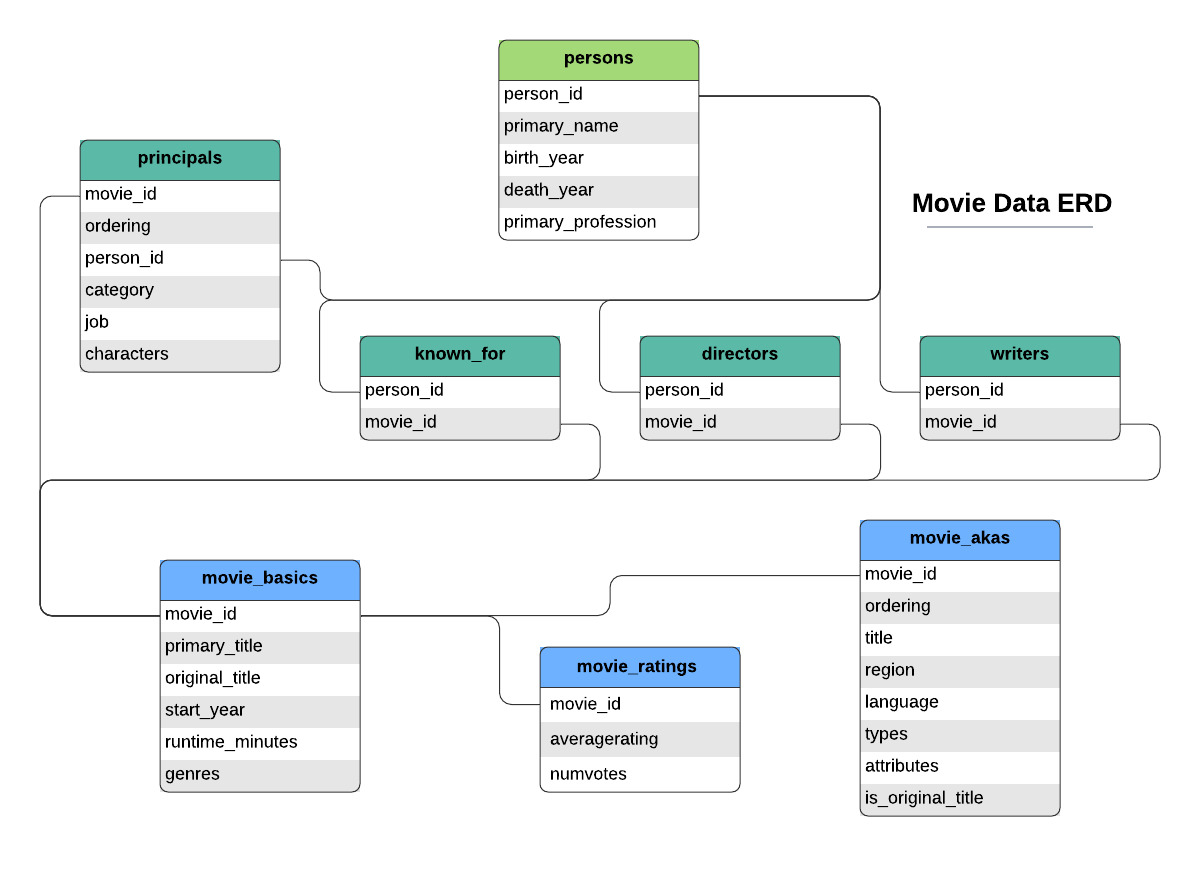

##### Cleaning the rt.movie_info.tsv

In [53]:
# Opening and inspecting rt movies information
rt_mov = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
rt_mov

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [54]:
# Checking for missing values
rt_mov.isna().sum()


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [55]:
# There are 68% missing values in studio so we shall drop it
fun_column_drop(rt_mov, 'studio')

In [56]:
# Filling in null in currency with mode
fun_mode_fill_null(rt_mov, 'currency')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",nan,NaN,104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",nan,NaN,116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",nan,NaN,128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,nan,NaN,200 minutes
...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",nan,NaN,88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",nan,NaN,111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",nan,NaN,101 minutes


In [57]:
# We shall create new column to see the days and months of release for movies
fun_date_convert(rt_mov, 'theater_date', 'Theater Day', 'Theater Month')
fun_date_convert(rt_mov, 'dvd_date', 'DVD Day', 'DVD Month')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,Theater Day,Theater Month,DVD Day,DVD Month
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,nan,NaN,104 minutes,Saturday,October,Tuesday,September
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Friday,August,Tuesday,January
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,nan,NaN,116 minutes,Friday,September,Tuesday,April
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,nan,NaN,128 minutes,Friday,December,Wednesday,August
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,nan,NaN,200 minutes,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,2006-08-18,2007-01-02,$,"33,886,034",106 minutes,Friday,August,Tuesday,January
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,2001-04-17,nan,NaN,88 minutes,Friday,July,Tuesday,April
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,2004-05-11,nan,NaN,111 minutes,Monday,January,Tuesday,May
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,2002-01-29,nan,NaN,101 minutes,Thursday,April,Tuesday,January


In [58]:
rt_mov.dtypes

id                        int64
synopsis                 object
rating                   object
genre                    object
director                 object
writer                   object
theater_date     datetime64[ns]
dvd_date         datetime64[ns]
currency                 object
box_office               object
runtime                  object
Theater Day              object
Theater Month            object
DVD Day                  object
DVD Month                object
dtype: object

In [59]:
rt_mov['runtime'] = rt_mov['runtime'].str.replace(' minutes', '').astype(float)

In [60]:
rt_mov['box_office'] = rt_mov['box_office'].str.replace(',', '').astype(float)

In [61]:
rt_mov.dtypes

id                        int64
synopsis                 object
rating                   object
genre                    object
director                 object
writer                   object
theater_date     datetime64[ns]
dvd_date         datetime64[ns]
currency                 object
box_office              float64
runtime                 float64
Theater Day              object
Theater Month            object
DVD Day                  object
DVD Month                object
dtype: object

In [62]:
# nan appear to be registered as an director name. We shall replace it showing as a missing value
rt_mov['director'] = rt_mov['director'].replace('nan', np.nan)
rt_mov['writer'] = rt_mov['writer'].replace(np.nan)

In [63]:
fun_mode_fill_null(rt_mov, 'rating')
fun_mode_fill_null(rt_mov, 'genre')
fun_mode_fill_null(rt_mov, 'director')
fun_mode_fill_null(rt_mov, 'writer')
fun_median_fill_null(rt_mov, 'runtime')
fun_median_fill_null(rt_mov, 'box_office')
fun_mode_fill_null(rt_mov, 'theater_date')
fun_mode_fill_null(rt_mov, 'dvd_date')
fun_mode_fill_null(rt_mov, 'Theater Day')
fun_mode_fill_null(rt_mov, 'Theater Month')
fun_mode_fill_null(rt_mov, 'DVD Day')
fun_mode_fill_null(rt_mov, 'DVD Month')
rt_mov.isna().sum()
# We shall leave the null values in synopsis as it's not possible to replicate unique sentences

id                0
synopsis         62
rating            0
genre             0
director          0
writer            0
theater_date      0
dvd_date          0
currency          0
box_office        0
runtime           0
Theater Day       0
Theater Month     0
DVD Day           0
DVD Month         0
dtype: int64

In [64]:
rt_mov

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,Theater Day,Theater Month,DVD Day,DVD Month
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,nan,14141054.5,104.0,Saturday,October,Tuesday,September
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108.0,Friday,August,Tuesday,January
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,nan,14141054.5,116.0,Friday,September,Tuesday,April
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,nan,14141054.5,128.0,Friday,December,Wednesday,August
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,nan,14141054.5,200.0,Friday,nan,Tuesday,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,nan,Joel Coen|Ethan Coen,2006-08-18 00:00:00,2007-01-02 00:00:00,$,33886034.0,106.0,Friday,August,Tuesday,January
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23 00:00:00,2001-04-17 00:00:00,nan,14141054.5,88.0,Friday,July,Tuesday,April
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1962-01-01 00:00:00,2004-05-11 00:00:00,nan,14141054.5,111.0,Monday,January,Tuesday,May
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01 00:00:00,2002-01-29 00:00:00,nan,14141054.5,101.0,Thursday,April,Tuesday,January


##### Cleaning the rt.reviews.tsv

In [65]:
# Opening and inspecting rt reviews
rt_rev = pd.read_csv('zippedData/rt.reviews.tsv', encoding = 'latin-1', sep='\t')
rt_rev

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [66]:
# Checking for missing values
rt_rev.isna().sum()


id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [67]:
# Adding day and month columns
fun_date_convert(rt_rev, 'date', 'Day', 'Month')


,id,review,rating,fresh,critic,top_critic,publisher,date,Day,Month
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10,Saturday,November
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23,Wednesday,May
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04,Thursday,January
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16,Thursday,November
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12,Thursday,October
...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,2002-09-24,Tuesday,September
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,2005-09-21,Wednesday,September
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,2005-07-17,Sunday,July
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,2003-09-07,Sunday,September


In [68]:
#This column is filled with both letter and number making it difficult to analyse so we shall drop it and use fresh columns as an alternative
fun_column_drop(rt_rev, 'rating')


In [69]:
# We shall fill the null values of publishers and critics with the mode
fun_mode_fill_null(rt_rev, 'publisher')
rt_rev.isna().sum()
# We shall not replace the reviews or critics as they have as they are unique to each other


id               0
review        5563
fresh            0
critic        2722
top_critic       0
publisher        0
date             0
Day              0
Month            0
dtype: int64

In [70]:
# We shall not remove duplicates as critics appear more than once reviewing different movies

In [71]:
rt_rev

,id,review,fresh,critic,top_critic,publisher,date,Day,Month
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10,Saturday,November
1,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,2018-05-23,Wednesday,May
2,3,... life lived in a bubble in financial dealin...,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04,Thursday,January
3,3,Continuing along a line introduced in last yea...,fresh,Daniel Kasman,0,MUBI,2017-11-16,Thursday,November
4,3,... a perverse twist on neorealism...,fresh,NaN,0,Cinema Scope,2017-10-12,Thursday,October
...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,fresh,Laura Sinagra,1,Village Voice,2002-09-24,Tuesday,September
54428,2000,NaN,rotten,Michael Szymanski,0,Zap2it.com,2005-09-21,Wednesday,September
54429,2000,NaN,rotten,Emanuel Levy,0,EmanuelLevy.Com,2005-07-17,Sunday,July
54430,2000,NaN,rotten,Christopher Null,0,Filmcritic.com,2003-09-07,Sunday,September


##### Cleaning the tn.movie_budgets.csv

In [72]:
# Opening and inspecting tn.movie_budgets.csv
tn = pd.read_csv('zippedData/tn.movie_budgets.csv', encoding = 'latin-1')
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [73]:
# Checking for null values
tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [74]:
# Removing duplicates using unique identifier id
fun_duplicate_count(tn, 'id')
fun_duplicates_drop(tn, 'id')


1


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
95,96,"Mar 8, 2019",Captain Marvel,"$175,000,000","$426,525,952","$1,123,061,550"
96,97,"Apr 15, 2016",The Jungle Book,"$175,000,000","$364,001,123","$962,854,547"
97,98,"Jun 19, 2015",Inside Out,"$175,000,000","$356,461,711","$854,235,992"
98,99,"Jul 7, 2017",Spider-Man: Homecoming,"$175,000,000","$334,201,140","$880,166,350"


In [75]:
# Creating a new column for Release days and months
fun_date_convert(tn, 'release_date', 'Release Day', 'Release Month')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release Day,Release Month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Friday,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Friday,May
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Friday,June
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Friday,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Friday,December
...,...,...,...,...,...,...,...,...
95,96,2019-03-08,Captain Marvel,"$175,000,000","$426,525,952","$1,123,061,550",Friday,March
96,97,2016-04-15,The Jungle Book,"$175,000,000","$364,001,123","$962,854,547",Friday,April
97,98,2015-06-19,Inside Out,"$175,000,000","$356,461,711","$854,235,992",Friday,June
98,99,2017-07-07,Spider-Man: Homecoming,"$175,000,000","$334,201,140","$880,166,350",Friday,July


In [76]:
# Creating a new column foreign gross assuming worldwide gross contains both domestic andforeign gross
tn['production_budget'] = [float(x.replace('$', '').replace(',', '')) for x in tn['production_budget'] ]
tn['domestic_gross'] = [float(x.replace('$', '').replace(',', '')) for x in tn['domestic_gross'] ]
tn['worldwide_gross'] = [float(x.replace('$', '').replace(',', '')) for x in tn['worldwide_gross'] ]
tn['foreign_gross'] = tn['worldwide_gross'] - tn['domestic_gross']

In [77]:
# We shall reorder the columns to be more aligned
tn = tn.reindex(columns = ['movie', 'production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'release_date', 'Release Day', 'Release Month'])
tn

,movie,production_budget,domestic_gross,foreign_gross,worldwide_gross,release_date,Release Day,Release Month
0,Avatar,425000000.0,760507625.0,2.015838e+09,2.776345e+09,2009-12-18,Friday,December
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,8.046000e+08,1.045664e+09,2011-05-20,Friday,May
2,Dark Phoenix,350000000.0,42762350.0,1.070000e+08,1.497624e+08,2019-06-07,Friday,June
3,Avengers: Age of Ultron,330600000.0,459005868.0,9.440081e+08,1.403014e+09,2015-05-01,Friday,May
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,6.965404e+08,1.316722e+09,2017-12-15,Friday,December
...,...,...,...,...,...,...,...,...
95,Captain Marvel,175000000.0,426525952.0,6.965356e+08,1.123062e+09,2019-03-08,Friday,March
96,The Jungle Book,175000000.0,364001123.0,5.988534e+08,9.628545e+08,2016-04-15,Friday,April
97,Inside Out,175000000.0,356461711.0,4.977743e+08,8.542360e+08,2015-06-19,Friday,June
98,Spider-Man: Homecoming,175000000.0,334201140.0,5.459652e+08,8.801664e+08,2017-07-07,Friday,July


# Exploratory Data Analysis

#### This section will be the exploratory data analysis question where I will exploring the cleaning data based on 3 categories


#### 1. Finance
#### 2. Characteristics
#### 3. Human Resources 

### 1. Finance

In the data cleaning section, it was revealed that there are 2 tables containing data on the financial aspects of finance - BOM and TN. We shall be using these 2 tables for this section

In [78]:
bom


,title,studio,domestic_gross,foreign_gross,worldwide_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,1.067000e+09,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,1.025500e+09,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,9.603000e+08,2010
3,Inception,WB,292600000.0,535700000.0,8.283000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,7.526000e+08,2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,1.890620e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,1.890480e+07,2018
3384,El Pacto,Sony,2500.0,18900000.0,1.890250e+07,2018
3385,The Swan,Synergetic,2400.0,18900000.0,1.890240e+07,2018


In [79]:
tn

,movie,production_budget,domestic_gross,foreign_gross,worldwide_gross,release_date,Release Day,Release Month
0,Avatar,425000000.0,760507625.0,2.015838e+09,2.776345e+09,2009-12-18,Friday,December
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,8.046000e+08,1.045664e+09,2011-05-20,Friday,May
2,Dark Phoenix,350000000.0,42762350.0,1.070000e+08,1.497624e+08,2019-06-07,Friday,June
3,Avengers: Age of Ultron,330600000.0,459005868.0,9.440081e+08,1.403014e+09,2015-05-01,Friday,May
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,6.965404e+08,1.316722e+09,2017-12-15,Friday,December
...,...,...,...,...,...,...,...,...
95,Captain Marvel,175000000.0,426525952.0,6.965356e+08,1.123062e+09,2019-03-08,Friday,March
96,The Jungle Book,175000000.0,364001123.0,5.988534e+08,9.628545e+08,2016-04-15,Friday,April
97,Inside Out,175000000.0,356461711.0,4.977743e+08,8.542360e+08,2015-06-19,Friday,June
98,Spider-Man: Homecoming,175000000.0,334201140.0,5.459652e+08,8.801664e+08,2017-07-07,Friday,July


 From the BOM and TN tables above, we have access to the domestic gross, foreign and worldwide gross.
 The TN table provides an additional column, production budget.

#### What is the average ROI, production budget, domestic gross, foreign gross and worldwide gross for movies

In [80]:
# To get the ROI, I will use the TN table, subtracting production budget from wordwide gross then dividing it by the production budget
tn['ROI'] = (tn['worldwide_gross'] - tn['production_budget']) / tn['production_budget']
tn

,movie,production_budget,domestic_gross,foreign_gross,worldwide_gross,release_date,Release Day,Release Month,ROI
0,Avatar,425000000.0,760507625.0,2.015838e+09,2.776345e+09,2009-12-18,Friday,December,5.532577
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,8.046000e+08,1.045664e+09,2011-05-20,Friday,May,1.546673
2,Dark Phoenix,350000000.0,42762350.0,1.070000e+08,1.497624e+08,2019-06-07,Friday,June,-0.572108
3,Avengers: Age of Ultron,330600000.0,459005868.0,9.440081e+08,1.403014e+09,2015-05-01,Friday,May,3.243841
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,6.965404e+08,1.316722e+09,2017-12-15,Friday,December,3.153696
...,...,...,...,...,...,...,...,...,...
95,Captain Marvel,175000000.0,426525952.0,6.965356e+08,1.123062e+09,2019-03-08,Friday,March,5.417495
96,The Jungle Book,175000000.0,364001123.0,5.988534e+08,9.628545e+08,2016-04-15,Friday,April,4.502026
97,Inside Out,175000000.0,356461711.0,4.977743e+08,8.542360e+08,2015-06-19,Friday,June,3.881349
98,Spider-Man: Homecoming,175000000.0,334201140.0,5.459652e+08,8.801664e+08,2017-07-07,Friday,July,4.029522


In [81]:
#We shall the use the mean method to get mean using the tn table
movie_ROI = tn['ROI'].mean()
budget_mean = tn['production_budget'].mean()
foreign_mean = tn['foreign_gross'].mean()
domestic_mean = tn['domestic_gross'].mean()
worldwide_mean = tn['worldwide_gross'].mean()

print('The average movie ROI is', movie_ROI)
print('The average foreign gross is', round(foreign_mean))
print('The average domestic mean is', round(domestic_mean))
print('The average worldwide mean is', round(worldwide_mean))
print('The average production budget mean is', round(budget_mean))

The average movie ROI is 2.5617047600547114
The average foreign gross is 501631541
The average domestic mean is 277057807
The average worldwide mean is 1000221883
The average production budget mean is 218147000


We now know what is the average ROI, average production budget, average domestic gross, average foreign gross.

We do not have the production budget of BOM so we shall not use its details as it will increase the gross relative to production

### Financial Visualization

In [82]:
# I will start visualization by making all relevant information a list
production_budget_list = list(tn['production_budget'])
ROI_list = list(tn['ROI'])
foreign_gross_list = list(tn['worldwide_gross'])
domestic_gross_list = list(tn['domestic_gross'])
worldwide_gross_list = list(tn['worldwide_gross'])


The chosen plot I have opted to use is a scatter plot

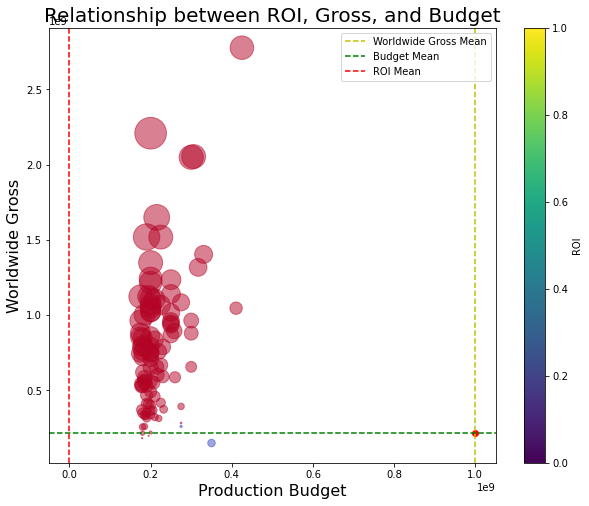

In [83]:
# I will specify the size of figure using figsize
fig = plt.figure(figsize=(10, 8))

# I'll create scatter plot with production budget on the x-axis, worldwide gross on the y-axis, and size of the dots proportional to ROI
plt.scatter(production_budget_list, worldwide_gross_list, s = np.abs(ROI_list)*100, c = np.sign(ROI_list), alpha=0.5, cmap='coolwarm')
plt.title('Relationship between ROI, Gross, and Budget', fontsize=20)
plt.xlabel('Production Budget', fontsize=16)
plt.ylabel('Worldwide Gross', fontsize=16)

# I'll the add the mean values to the plot
plt.axvline(x=worldwide_mean, color='y', linestyle='--', label = 'Worldwide Gross Mean')
plt.axhline(y=budget_mean, color='g', linestyle='--', label = 'Budget Mean')
plt.axvline(x=movie_ROI, color='r', linestyle='--', label='ROI Mean')
plt.scatter(worldwide_mean, budget_mean, color='r')

# add colorbar to show the mapping between the color and ROI values
cbar = plt.colorbar()
cbar.ax.set_ylabel('ROI')

plt.legend()
plt.show()

From the plot shown above, the distribution of highest average ROI is achieved when the Production Budget mean is below average but gross is above average

There is a case for having low production movies(Below average production budgets) but with high appeal generating the largest worldwide gross

### 2. Movie Characteristics

In order for a studio to generate the highest ROI possible, it is best to look into the characteristics of the most popular movies

#### What is the most popular language ?

We can answer this by using the tmdb table to find the language used in popular movies

In [84]:
tmdb

,original_title,title,original_language,popularity,vote_count,vote_average,release_date,Release Day,Release Month
0,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,en,33.533,10788,7.7,2010-11-19,Friday,November
1,How to Train Your Dragon,How to Train Your Dragon,en,28.734,7610,7.7,2010-03-26,Friday,March
2,Iron Man 2,Iron Man 2,en,28.515,12368,6.8,2010-05-07,Friday,May
3,Toy Story,Toy Story,en,28.005,10174,7.9,1995-11-22,Wednesday,November
4,Inception,Inception,en,27.920,22186,8.3,2010-07-16,Friday,July
...,...,...,...,...,...,...,...,...,...
26512,Laboratory Conditions,Laboratory Conditions,en,0.600,1,0.0,2018-10-13,Saturday,October
26513,_EXHIBIT_84xxx_,_EXHIBIT_84xxx_,en,0.600,1,0.0,2018-05-01,Tuesday,May
26514,The Last One,The Last One,en,0.600,1,0.0,2018-10-01,Monday,October
26515,Trailer Made,Trailer Made,en,0.600,1,0.0,2018-06-22,Friday,June


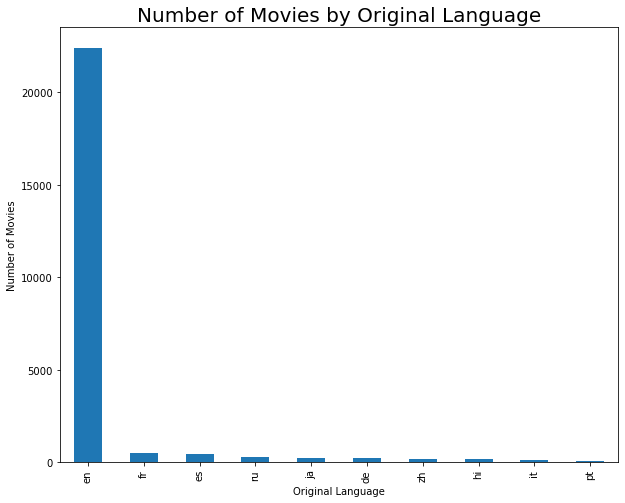

In [85]:
# I will create a bar graph to show the number of time a language has appeared
fig = plt.figure(figsize=(10, 8))

tmdb['original_language'].value_counts()[0:10].plot(kind='bar')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Original Language', fontsize=20)
plt.show()

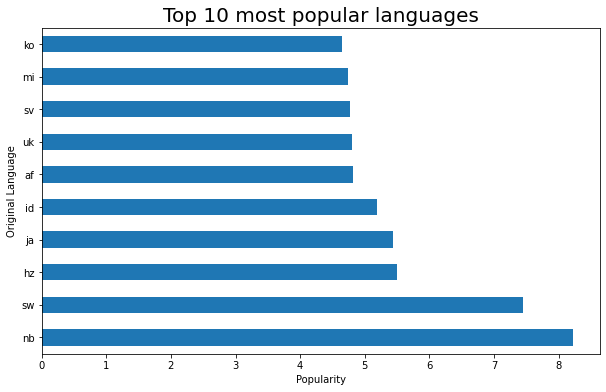

In [86]:
# I'll create another bar graph to show language popularity
fig = plt.figure(figsize=(10, 6))

# Group the data by original language and calculate the mean vote average for each group
lang_vote_avg = tmdb.groupby('original_language')['popularity'].mean()

# Sort the groups by the mean vote average in descending order
lang_vote_avg = lang_vote_avg.sort_values(ascending=False)

# Select the top 10 languages by mean vote average
top_lang_vote_avg = lang_vote_avg[:10]

# Plot the horizontal bar chart
top_lang_vote_avg.plot(kind='barh')
plt.xlabel('Popularity')
plt.ylabel('Original Language')
plt.title('Top 10 most popular languages', fontsize=20)

plt.show()

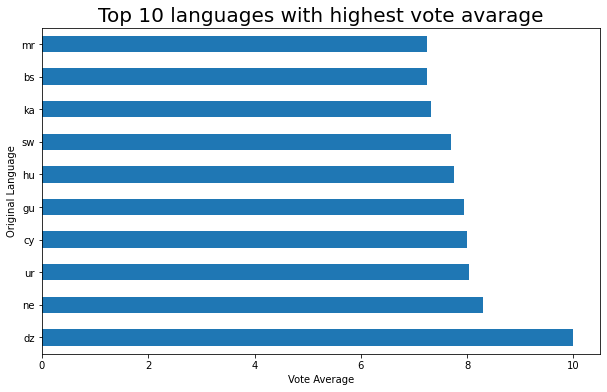

In [87]:
# create a figure with a specified size
fig = plt.figure(figsize=(10, 6))

# group the data by original language and calculate the mean vote average for each group
lang_vote_avg = tmdb.groupby('original_language')['vote_average'].mean()

# sort the groups by the mean vote average in descending order
lang_vote_avg = lang_vote_avg.sort_values(ascending=False)

# select the top 10 languages by mean vote average
top_lang_vote_avg = lang_vote_avg[:10]

# plot the horizontal bar chart
top_lang_vote_avg.plot(kind='barh')
plt.xlabel('Vote Average')
plt.ylabel('Original Language')
plt.title('Top 10 languages with highest vote avarage', fontsize=20)

# show the plot
plt.show()

From the plots above, we notice that the most used laguage is english. It also appears that in top 10 most popular language and vote average, english does not appear anywhere. 

The strategy we are trying to use is to focus appealing on the most number of people on the average or below average budget

<ipython-input-88-8232b7bb0764>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  lang_stats = tmdb.groupby('original_language')['vote_average', 'popularity'].mean()


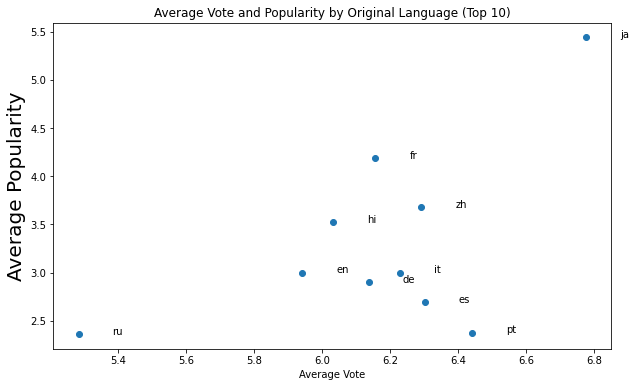

In [88]:
# I.ll create a plot that will combine popularity and vote average
fig = plt.figure(figsize=(10, 6))

# Group the data by original language and calculate the mean vote average and mean popularity for each group
lang_stats = tmdb.groupby('original_language')['vote_average', 'popularity'].mean()

# Sort the groups by the mean vote average in descending order
lang_stats = lang_stats.sort_values(by='vote_average', ascending=False)

# Select the top 10 languages by number of movies produced
top_lang_stats = lang_stats.loc[tmdb['original_language'].value_counts().index[0:10]]

# Sreate a scatter plot
plt.scatter(top_lang_stats['vote_average'], top_lang_stats['popularity'])

# Use loop to add labels
for i, lang in enumerate(top_lang_stats.index):
    plt.text(top_lang_stats.loc[lang, 'vote_average'] + 0.1, top_lang_stats.loc[lang, 'popularity'], lang)


# Set the title and axis labels
plt.title('Average Vote and Popularity by Original Language (Top 10)')
plt.xlabel('Average Vote')
plt.ylabel('Average Popularity', fontsize=20)

# show the plot
plt.show()

From the above plot, we now have a list of the top 10 languages that will have the best appeal or have the highest number of watches

#### What are the most popular genres ?

In [89]:
mov_bas

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Documentary


In [90]:
rt_mov

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,Theater Day,Theater Month,DVD Day,DVD Month
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,nan,14141054.5,104.0,Saturday,October,Tuesday,September
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108.0,Friday,August,Tuesday,January
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,nan,14141054.5,116.0,Friday,September,Tuesday,April
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,nan,14141054.5,128.0,Friday,December,Wednesday,August
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,nan,14141054.5,200.0,Friday,nan,Tuesday,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,nan,Joel Coen|Ethan Coen,2006-08-18 00:00:00,2007-01-02 00:00:00,$,33886034.0,106.0,Friday,August,Tuesday,January
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23 00:00:00,2001-04-17 00:00:00,nan,14141054.5,88.0,Friday,July,Tuesday,April
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1962-01-01 00:00:00,2004-05-11 00:00:00,nan,14141054.5,111.0,Monday,January,Tuesday,May
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01 00:00:00,2002-01-29 00:00:00,nan,14141054.5,101.0,Thursday,April,Tuesday,January


In [91]:
print(mov_bas['genres'].value_counts()[0:10])
print(rt_mov['genre'].value_counts()[0:10])

Documentary              37593
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64
Drama                                              159
Comedy                                             110
Comedy|Drama                                        80
Drama|Mystery and Suspense                          67
Art House and International|Drama                   62
Action and Adventure|Drama                          42
Action and Adventure|Drama|Mystery and Suspense     40
Drama|Romance                                       35
Comedy|Romance                                      32
Art House and International|Comedy|Drama            31
Name: genre, dtype: int64


As mov_bas has more records of genres,  will be using it to analyse what the most popular genres are

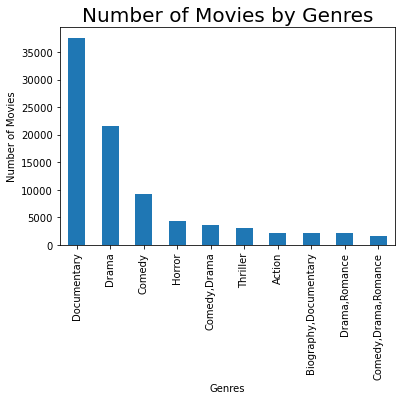

In [92]:
mov_bas['genres'].value_counts()[0:10].plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genres', fontsize=20)
plt.show()

In [124]:
rt_mov

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,Theater Day,Theater Month,DVD Day,DVD Month,Fresh,Rotten
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108.0,Friday,August,Tuesday,January,103.0,60.0
1,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,nan,14141054.5,116.0,Friday,September,Tuesday,April,18.0,5.0
2,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,nan,14141054.5,128.0,Friday,December,Wednesday,August,32.0,25.0
3,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03 00:00:00,2000-07-11 00:00:00,nan,14141054.5,95.0,Friday,March,Tuesday,July,56.0,19.0
4,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11 00:00:00,2002-06-18 00:00:00,$,41032915.0,82.0,Friday,January,Tuesday,June,50.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,nan,Joel Coen|Ethan Coen,2006-08-18 00:00:00,2007-01-02 00:00:00,$,33886034.0,106.0,Friday,August,Tuesday,January,96.0,47.0
1131,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23 00:00:00,2001-04-17 00:00:00,nan,14141054.5,88.0,Friday,July,Tuesday,April,10.0,18.0
1132,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1962-01-01 00:00:00,2004-05-11 00:00:00,nan,14141054.5,111.0,Monday,January,Tuesday,May,2.0,NaN
1133,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01 00:00:00,2002-01-29 00:00:00,nan,14141054.5,101.0,Thursday,April,Tuesday,January,27.0,19.0


In [125]:
Box_office_list = list(rt_mov['box_office'])
genres_office_list = list(rt_mov['genre'])

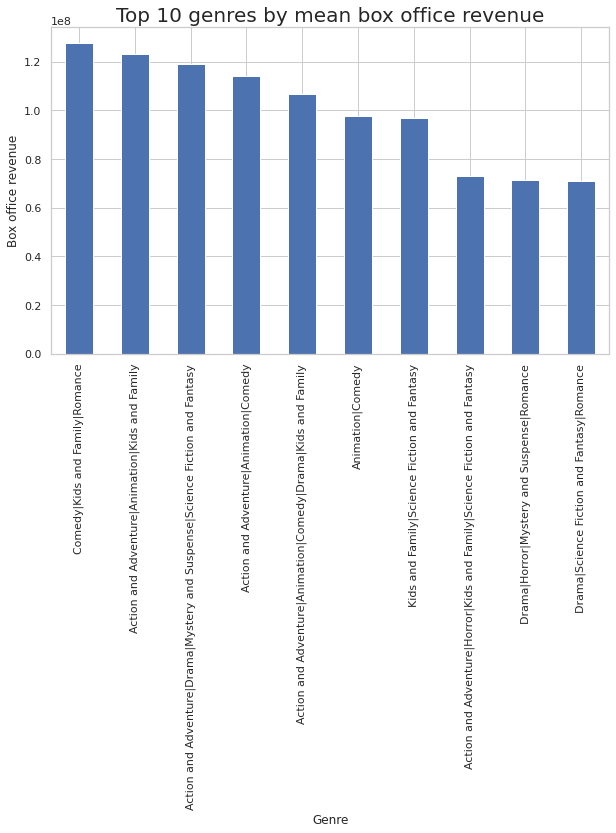

In [131]:
# I'll create a bar graph to show the success of a rating
fig = plt.figure(figsize=(10, 6))

# calculate the mean gross for each genre
mean_gross_by_genre = rt_mov.groupby('genre')['box_office'].mean()

# get the top 10 genres by mean box office revenue
top_10_genres = mean_gross_by_genre.nlargest(10)

# create a bar plot for the top 10 genres
top_10_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Box office revenue')
plt.title('Top 10 genres by mean box office revenue', fontsize=20)
plt.xticks(rotation=90)
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Biography,Mystery,Sci-Fi'),
  Text(1, 0, 'Drama,Western'),
  Text(2, 0, 'History,Musical,Romance'),
  Text(3, 0, 'Musical,Romance,Thriller'),
  Text(4, 0, 'Adventure,Animation,Crime'),
  Text(5, 0, 'Fantasy,Sci-Fi'),
  Text(6, 0, 'Adventure,Horror,Romance'),
  Text(7, 0, 'Action,Family,Thriller'),
  Text(8, 0, 'Comedy,History'),
  Text(9, 0, 'Action,Animation,Mystery')])

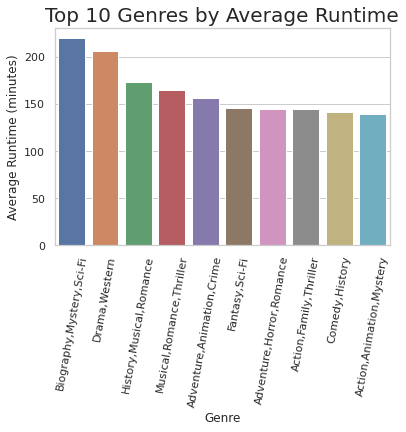

In [119]:
# Group the DataFrame by genre and calculate the mean runtime for each genre
mean_runtime_by_genre = mov_bas.groupby('genres')['runtime_minutes'].mean().reset_index()

# Sort the resulting DataFrame in descending order by mean runtime and select the top 10 genres and their mean runtimes
top_genres = mean_runtime_by_genre.sort_values(by='runtime_minutes', ascending=False).head(10)

# Create a bar chart using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="genres", y="runtime_minutes", data=top_genres)

# Set chart titles and labels
ax.set_title("Top 10 Genres by Average Runtime", fontsize=20)
ax.set_xlabel("Genre")
ax.set_ylabel("Average Runtime (minutes)")
plt.xticks(rotation=80)

We now know the top 10 genres and the top 10 genres by their runtime

I would now like to now the how well a particular rating does in the box office

#### What are the most lucrative ratings ?

In [94]:
rt_mov['DVD Day']

0         Tuesday
1         Tuesday
2         Tuesday
3       Wednesday
4         Tuesday
          ...    
1555      Tuesday
1556      Tuesday
1557      Tuesday
1558      Tuesday
1559      Tuesday
Name: DVD Day, Length: 1560, dtype: object

In [95]:
Rating_list = list(rt_mov['rating'])
Box_office_list = list(rt_mov['box_office'])
Runtime_list = list(rt_mov['runtime'])
Theater_day_list = list(rt_mov['Theater Day'])
Theater_month_list = list(rt_mov['Theater Month'])
DVD_day_list = list(rt_mov['DVD Day'])
DVD_month_list = list(rt_mov['DVD Month'])

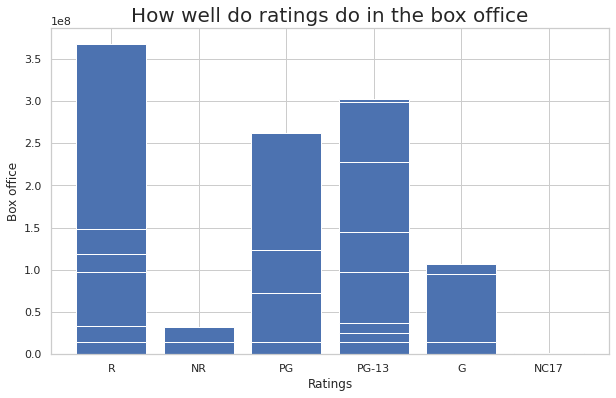

In [96]:
# I'll create a bar graph to show the success of a rating
fig = plt.figure(figsize=(10, 6))

# Create a bar graph
plt.bar(Rating_list, Box_office_list)

# Add labels and titles
plt.xlabel('Ratings')
plt.ylabel('Box office')
plt.title('How well do ratings do in the box office', fontsize=20)

# Display the graph
plt.show()

#### What are the days and months are best to release movies ?

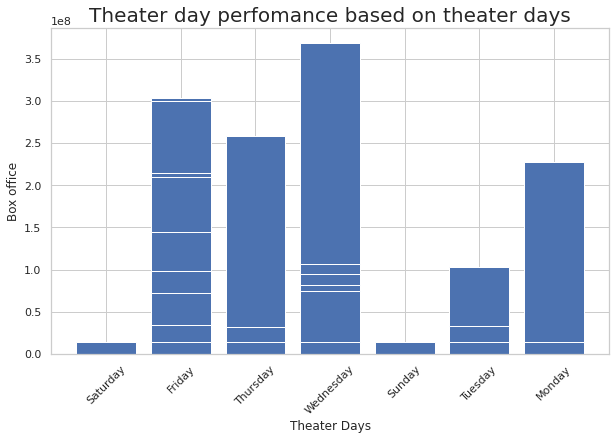

In [97]:
#I'll create a bar graph that will count the number of times a day has appeared
fig = plt.figure(figsize=(10, 6))

# Create a bar graph
plt.bar(Theater_day_list, Box_office_list)

# Add labels and titles
plt.xlabel('Theater Days')
plt.ylabel('Box office')
plt.title('Theater day perfomance based on theater days', fontsize=20)
plt.xticks(rotation=45)
# Display the graph
plt.show()

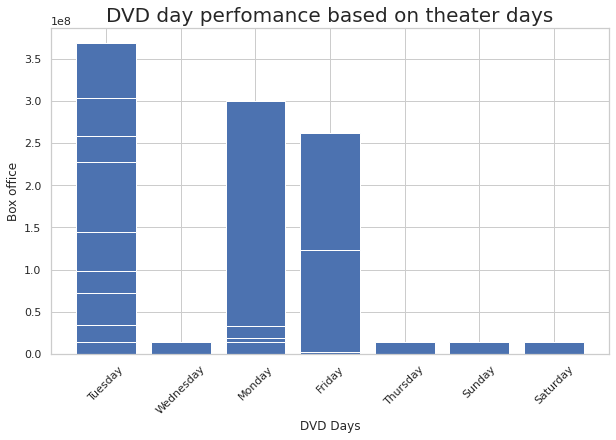

In [98]:
#I'll create a bar graph that will count the number of times a day has appeared
fig = plt.figure(figsize=(10, 6))

# Create a bar graph
plt.bar(DVD_day_list, Box_office_list)

# Add labels and titles
plt.xlabel('DVD Days')
plt.ylabel('Box office')
plt.title('DVD day perfomance based on theater days', fontsize=20)
plt.xticks(rotation=45)
# Display the graph
plt.show()

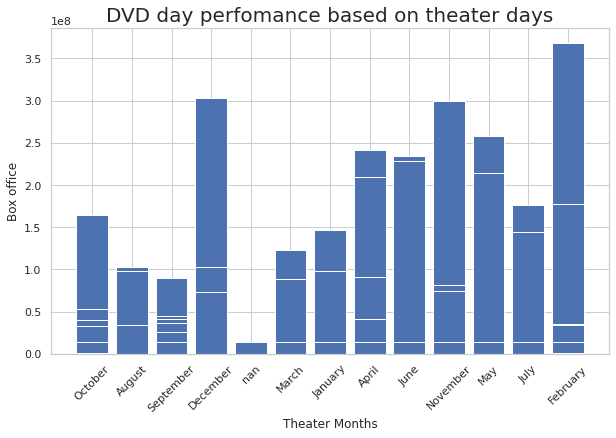

In [99]:
#I'll create a bar graph that will count the number of times a month has appeared
fig = plt.figure(figsize=(10, 6))

# Create a bar graph
plt.bar(Theater_month_list, Box_office_list)

# Add labels and titles
plt.xlabel('Theater Months')
plt.ylabel('Box office')
plt.title('DVD day perfomance based on theater days', fontsize=20)
plt.xticks(rotation=45)
# Display the graph
plt.show()

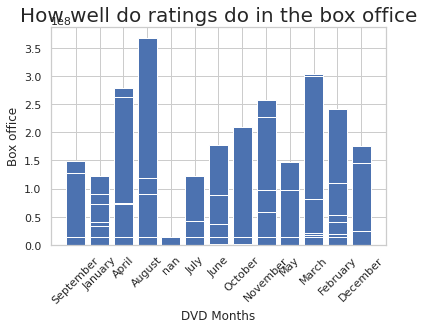

In [100]:
# Create a bar graph
plt.bar(DVD_month_list, Box_office_list)

# Add labels and titles
plt.xlabel('DVD Months')
plt.ylabel('Box office')
plt.title('DVD day perfomance based on DVD Months', fontsize=20)
plt.xticks(rotation=45)
# Display the graph
plt.show()

We now know what days and months are best to release the most lucrative movies

#### Do critic ratings influence earnings?

In [101]:
rt_rev

,id,review,fresh,critic,top_critic,publisher,date,Day,Month
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10,Saturday,November
1,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,2018-05-23,Wednesday,May
2,3,... life lived in a bubble in financial dealin...,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04,Thursday,January
3,3,Continuing along a line introduced in last yea...,fresh,Daniel Kasman,0,MUBI,2017-11-16,Thursday,November
4,3,... a perverse twist on neorealism...,fresh,NaN,0,Cinema Scope,2017-10-12,Thursday,October
...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,fresh,Laura Sinagra,1,Village Voice,2002-09-24,Tuesday,September
54428,2000,NaN,rotten,Michael Szymanski,0,Zap2it.com,2005-09-21,Wednesday,September
54429,2000,NaN,rotten,Emanuel Levy,0,EmanuelLevy.Com,2005-07-17,Sunday,July
54430,2000,NaN,rotten,Christopher Null,0,Filmcritic.com,2003-09-07,Sunday,September


In [102]:
# I'll try merging the tables rt_rev and rt_mov and see how to count number of rotten and fresh
# Group tableB by ID and Review, count the number of occurrences of each, and unstack the results
Fresh_reviews = rt_rev.groupby(['id', 'fresh'])['fresh'].count().unstack()
# Rename the columns to 'bad' and 'good'
Fresh_reviews.columns = ['Fresh', 'Rotten']
# Merge the counts with tableA on the 'ID' column
merged_table = pd.merge(rt_mov, Fresh_reviews, on = 'id')

rt_mov = merged_table
rt_mov

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,Theater Day,Theater Month,DVD Day,DVD Month,Fresh,Rotten
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108.0,Friday,August,Tuesday,January,103.0,60.0
1,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,nan,14141054.5,116.0,Friday,September,Tuesday,April,18.0,5.0
2,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,nan,14141054.5,128.0,Friday,December,Wednesday,August,32.0,25.0
3,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03 00:00:00,2000-07-11 00:00:00,nan,14141054.5,95.0,Friday,March,Tuesday,July,56.0,19.0
4,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11 00:00:00,2002-06-18 00:00:00,$,41032915.0,82.0,Friday,January,Tuesday,June,50.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,nan,Joel Coen|Ethan Coen,2006-08-18 00:00:00,2007-01-02 00:00:00,$,33886034.0,106.0,Friday,August,Tuesday,January,96.0,47.0
1131,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23 00:00:00,2001-04-17 00:00:00,nan,14141054.5,88.0,Friday,July,Tuesday,April,10.0,18.0
1132,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1962-01-01 00:00:00,2004-05-11 00:00:00,nan,14141054.5,111.0,Monday,January,Tuesday,May,2.0,NaN
1133,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01 00:00:00,2002-01-29 00:00:00,nan,14141054.5,101.0,Thursday,April,Tuesday,January,27.0,19.0


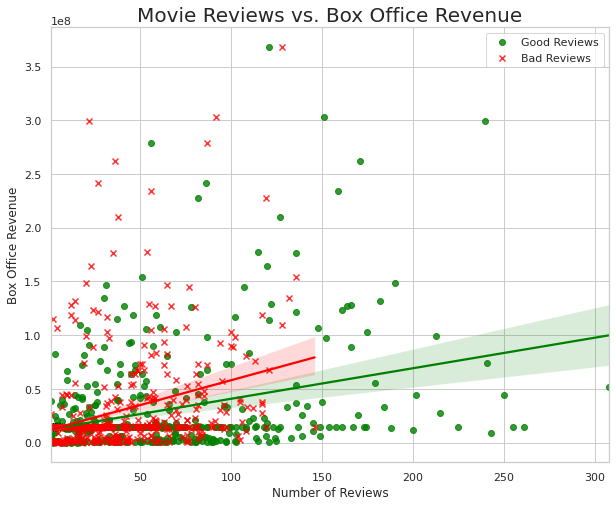

In [103]:
# create a figure with a specified size
fig = plt.figure(figsize=(10, 8))

# Extract the columns of interest
gross = rt_mov['box_office']
good_reviews = rt_mov['Fresh']
bad_reviews = rt_mov['Rotten']

# Create a scatter plot with regression line
sns.regplot(x=good_reviews, y=gross,marker='o', color='green', label='Good Reviews')
sns.regplot(x=bad_reviews, y=gross, marker='x', color='red',label='Bad Reviews')

# Add axis labels and a title
plt.xlabel('Number of Reviews')
plt.ylabel('Box Office Revenue')
plt.title('Movie Reviews vs. Box Office Revenue', fontsize=20)

# Add a legend
plt.legend()

# Display the plot
plt.show()

From the plot above we see that critc reviews do influence earning.

### 3. Human Resources

To create a movie, we need to know the kind of staff/professional we need

#### How many kinds of professional are in the markets?

In [104]:
mov_princi

,movie_id,ordering,person_id,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress
...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor
1028182,tt9692684,2,nm4929530,self
1028183,tt9692684,3,nm10441594,director
1028184,tt9692684,4,nm6009913,writer


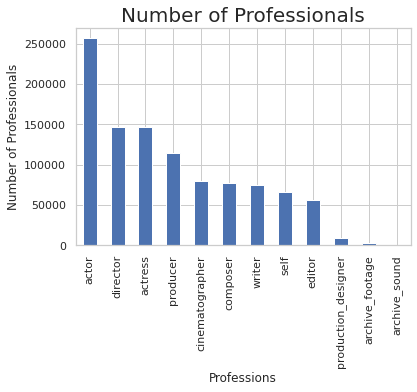

In [105]:
mov_princi['category'].value_counts().plot(kind='bar')
plt.xlabel('Professions')
plt.ylabel('Number of Professionals')
plt.title('Number of Professionals', fontsize=20)
plt.show()

#### How many professionals do we need per movie?

In [108]:
# I want to count the number of professional that have appeared per movie
# Merge the two tables by ID
people_run = pd.merge(mov_bas, mov_princi, on='movie_id')

# group by movie and profession, and count the number of occurrences
counts = people_run.groupby(['primary_title', 'category']).size().reset_index(name='Count')

# pivot the table so that each profession becomes a separate column
pivot_table = counts.pivot_table(values='Count', index='primary_title', columns='category', fill_value=0)

# merge the pivot table with the original table
result = pd.merge(mov_bas, pivot_table, left_on='primary_title', right_index=True)

# display the result
result

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,actor,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3,1,0,0,0,1,1,0,0,0,0,4
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",2,2,0,0,1,1,1,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,2,2,0,0,1,1,1,1,2,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",4,3,0,0,0,1,1,0,0,0,0,1
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",2,2,0,0,0,1,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,1,3,0,0,0,1,1,0,1,0,0,3
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary,1,0,0,0,4,0,2,0,0,0,3,0
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy,3,2,0,0,2,0,1,0,1,0,0,1
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Documentary,4,0,0,0,1,0,1,1,2,0,0,0


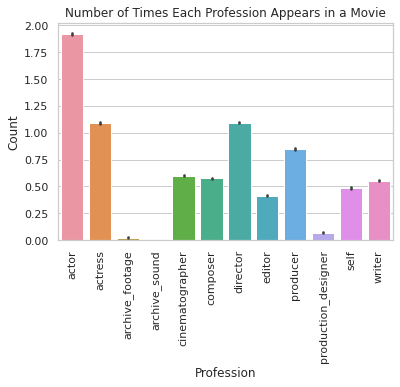

In [109]:
# I put the count in a table
# melt the pivot table to make plotting easier
melted_df = pivot_table.reset_index().melt(id_vars=['primary_title'], var_name='profession', value_name='count')

# create a bar plot
sns.barplot(x='profession', y='count', data=melted_df)

# set the chart title and labels
plt.title('Number of Times Each Profession Appears in a Movie')
plt.xlabel('Profession')
plt.ylabel('Count')

# rotate the x-axis labels to prevent overlap
plt.xticks(rotation=90)

# display the plot
plt.show()

#### Does director or writer choice affect revenue?

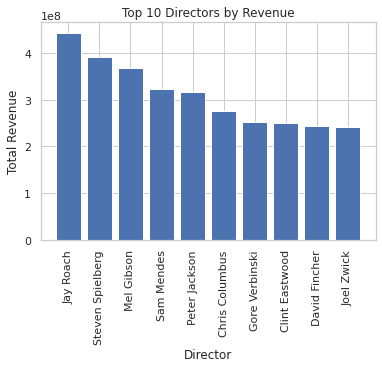

In [110]:
# group by director and sum the revenue
revenue_by_director = rt_mov.groupby('director')['box_office'].sum().reset_index()

# sort the data by revenue in descending order and select the top 10 directors
top_directors = revenue_by_director.sort_values('box_office', ascending=False).iloc[1:11]

# create a bar plot
plt.bar(top_directors['director'], top_directors['box_office'])

# add titles and labels
plt.title('Top 10 Directors by Revenue')
plt.xlabel('Director')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)

# show the plot
plt.show()

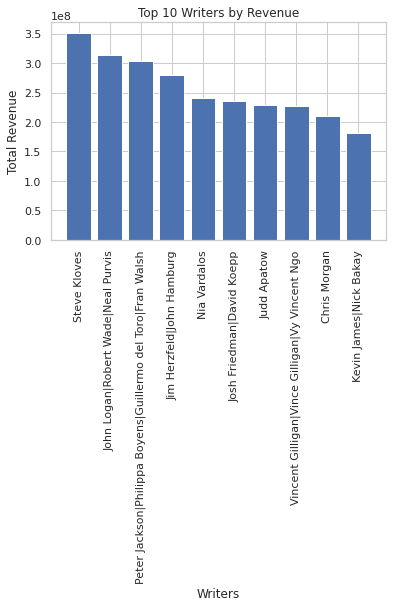

In [123]:
# group by director and sum the revenue
revenue_by_writer = rt_mov.groupby('writer')['box_office'].sum().reset_index()

# sort the data by revenue in descending order and select the top 10 directors
top_writer = revenue_by_writer.sort_values('box_office', ascending=False).iloc[1:11]

# create a bar plot
plt.bar(top_writer['writer'], top_writer['box_office'])

# add titles and labels
plt.title('Top 10 Writers by Revenue')
plt.xlabel('Writers')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)

# show the plot
plt.show()

We can tell that the choice of directors does influence revenue

# Conclusion

In conclusion, we now have an understanding of the datasets provided and can now create recommendations from them

In [116]:
top_lang_stats
top_languages = ['English', 'French', 'Spanish', 'Russian', 'Japanese', 'German', 'Chinese', 'Hindi', 'Italian', 'Portuguese']
top_10_g = dict(mov_bas['genres'].value_counts()[0:10])
top_mov_runtime = list(top_10_g.keys())
top_ratings = rt_mov['rating'].value_counts()
top_theater_days = rt_mov['Theater Day'].value_counts()[0:5]
top_DVD_days = rt_mov['DVD Day'].value_counts()[0:5]
top_theater_months = rt_mov['Theater Month'].value_counts()[0:10]
top_DVD_months = rt_mov['DVD Month'].value_counts()[0:10]


In [117]:
print('FINANCE RECOMMENDATIONS')
print('The recommended movie ROI is', movie_ROI)
print('The recommended foreign gross is', round(foreign_mean))
print('The recommended domestic mean is', round(domestic_mean))
print('The recommended worldwide mean is', round(worldwide_mean))
print('The recommended production budget mean is', round(budget_mean))

print('MOVIE CHARACTERISTICS RECOMMENDATIONS')
print('Top 10 best languages are', top_languages)
print('Top 10 best genres by number', top_genres)
print('Top 10 best genres by runtime', top_mov_runtime )
print('Best movies to make based on rating in order', top_ratings)
print('The best days to release on theater are', top_theater_days )
print('The best days to release on DVD are', top_DVD_days )
print('The best months to release on theater are', top_theater_months )
print('The best months to release on DVD are', top_DVD_months )

FINANCE RECOMMENDATIONS
The recommended movie ROI is 2.5617047600547114
The recommended foreign gross is 501631541
The recommended domestic mean is 277057807
The recommended worldwide mean is 1000221883
The recommended production budget mean is 218147000
MOVIE CHARACTERISTICS RECOMMENDATIONS
Top 10 best languages are ['English', 'French', 'Spanish', 'Russian', 'Japanese', 'German', 'Chinese', 'Hindi', 'Italian', 'Portuguese']
Top 10 best genres by number                          genres  runtime_minutes
486    Biography,Mystery,Sci-Fi       220.000000
892               Drama,Western       206.477273
975     History,Musical,Romance       174.000000
1040   Musical,Romance,Thriller       165.000000
176   Adventure,Animation,Crime       157.000000
962              Fantasy,Sci-Fi       145.434783
284    Adventure,Horror,Romance       145.000000
112      Action,Family,Thriller       145.000000
566              Comedy,History       141.826087
33     Action,Animation,Mystery       140.000000
To